In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS)

In [2]:
def steepestDescentLinearSystemEquations(matrix, vector, tolerance, max_iterations):
    """
    Solve a linear system of equations using the steepest descent method.

    Parameters
    ----------
    matrix : numpy.ndarray
        A square matrix of size n x n.
    vector : numpy.ndarray
        A vector of size n.
    tolerance : float
        The tolerance for the stopping criterion.
    max_iterations : int
        The maximum number of iterations to perform if the stopping criterion is not met.

    Returns
    -------
    optima : numpy.ndarray
        The solution of the linear system of equations.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    if np.min(np.linalg.eigvals(matrix)) <= 0:
        raise ValueError("The matrix is not positive definite.")

    gradient = lambda x: matrix @ x - vector                    # Calculated the gradient of {1\over 2}x^TAx - b^Tx with respect to x
    iterator = np.random.rand(matrix.shape[0]).reshape(-1, 1)   # Initialize the iterator

    iterators = []
    gradient_norms = []
    
    for i in range(max_iterations):
        gradient_ = gradient(iterator)                       # Calculate the gradient
        gradient_squared_norm = np.sum(gradient_ ** 2)       # Calculate the squared norm of the gradient
        if np.sqrt(gradient_squared_norm) < tolerance:       # Check if the stopping criterion is met
            break
        
        alpha = gradient_squared_norm / (gradient_.T @ matrix @ gradient_ + 1e-8) # alpha = \nabla f(x)^T \nabla f(x) / \nabla f(x)^T A \nabla f(x)
        iterator = iterator - alpha * gradient(iterator)                          # Update Equation
        
        iterators.append(iterator.copy())
        gradient_norms.append(np.sqrt(gradient_squared_norm))

    cache = {"Iterator": iterators,
             "Gradient Norm": gradient_norms}
    return iterator, cache

In [3]:
def generateRandomSparsePSDSymmetricMatrix(size, density):
    """
    Generate a random sparse PSD Symmetric matrix.
    
    Parameters
    ----------
    size : int
        The size of the matrix.

    density : float
        The density of the generated matrix, density equal to one means a 
        full matrix, density of 0 means a matrix with no non-zero items.
    
    Returns
    -------
    sparse_symmetric_matrix : numpy.ndarray
        Symmetric n x n matrix with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    matrix = np.random.rand(size, size)            # Generating a random matrix
    mask = np.random.rand(size, size) < density    # Generating a mask
    matrix = matrix * mask                         # Applying the mask
    matrix = matrix + matrix.T                     # Making the matrix symmetric

    lowest_eigenval = np.min(np.linalg.eigvals(matrix))          # Finding the lowest eigenvalue of the matrix
    matrix = matrix + 2 * np.eye(size) * np.abs(lowest_eigenval) # Making the matrix positive definite

    return matrix, None

In [4]:
def generateSymmetricMatrixwithZeroDeterminant(size):
    """
    Generate a symmetric matrix with a zero determinant.
    
    Parameters
    ----------
    size : int
        The size of the matrix.
    
    Returns
    -------
    matrix : numpy.ndarray
        Symmetric n x n matrix with a zero determinant.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    matrix = np.random.rand(size, size)        # Generating a random matrix
    mask = np.random.rand(size, size) < 0.5    # Generating a mask
    matrix = matrix * mask                     # Applying the mask
    
    matrix = matrix + matrix.T                 # Making the matrix symmetric
    matrix[:, -1] = matrix[:, :-1].sum(axis=1) # Making the determinant of the matrix zero

    return matrix, None

In [5]:
def generateRandomSparseVector(size, density):
    """
    Generate a random sparse vector.

    Parameters
    ----------
    size : int
        The size of the vector.
    
    density : float
        The density of the generated vector, density equal to one means a 
        full vector, density of 0 means a vector with no non-zero items.
    
    Returns
    -------
    sparse_vector numpy.ndarray
        Vector of size n with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    vector = np.random.rand(size)           # Generating a random vector
    mask = np.random.rand(size) < density   # Generating a mask to make the vector sparse
    vector = vector * mask
    vector = vector.reshape(-1, 1)

    return vector, None

In [6]:
A, _ = generateRandomSparsePSDSymmetricMatrix(5, 0.2) 
# A, _ = generateSymmetricMatrixwithZeroDeterminant(5)
b, _ = generateRandomSparseVector(5, 0.5)

In [7]:
print("Matrix A:")
print(A)
print("Vector b:")
print(b)

Matrix A:
[[0.92633961 0.         0.37146363 0.24240515 0.        ]
 [0.         2.18431743 0.         0.40790758 0.61899977]
 [0.37146363 0.         0.92633961 0.         0.        ]
 [0.24240515 0.40790758 0.         0.92633961 0.        ]
 [0.         0.61899977 0.         0.         2.65604161]]
Vector b:
[[0.73325876]
 [0.        ]
 [0.        ]
 [0.73576761]
 [0.        ]]


In [8]:
np.linalg.pinv(A) @ b

array([[ 0.73765938],
       [-0.13182464],
       [-0.29580256],
       [ 0.65929108],
       [ 0.03072219]])

In [9]:
print("Matrix A:")
print(A)
print("Vector b:")
print(b)

Matrix A:
[[0.92633961 0.         0.37146363 0.24240515 0.        ]
 [0.         2.18431743 0.         0.40790758 0.61899977]
 [0.37146363 0.         0.92633961 0.         0.        ]
 [0.24240515 0.40790758 0.         0.92633961 0.        ]
 [0.         0.61899977 0.         0.         2.65604161]]
Vector b:
[[0.73325876]
 [0.        ]
 [0.        ]
 [0.73576761]
 [0.        ]]


In [10]:
optima, cache = steepestDescentLinearSystemEquations(A, b, 1e-6, 10000)

In [11]:
print("Solution by Steepest Descent: ", optima.T)

Solution by Steepest Descent:  [[ 0.73765784 -0.13182492 -0.29580133  0.65929213  0.03072227]]


In [12]:
optima_obtained_by_numpy = np.linalg.solve(A, b)
print("Solution by Numpy: ", optima_obtained_by_numpy.T)
print("Error: ", np.linalg.norm(optima - optima_obtained_by_numpy))

Solution by Numpy:  [[ 0.73765938 -0.13182464 -0.29580256  0.65929108  0.03072219]]
Error:  2.2456252491942087e-06


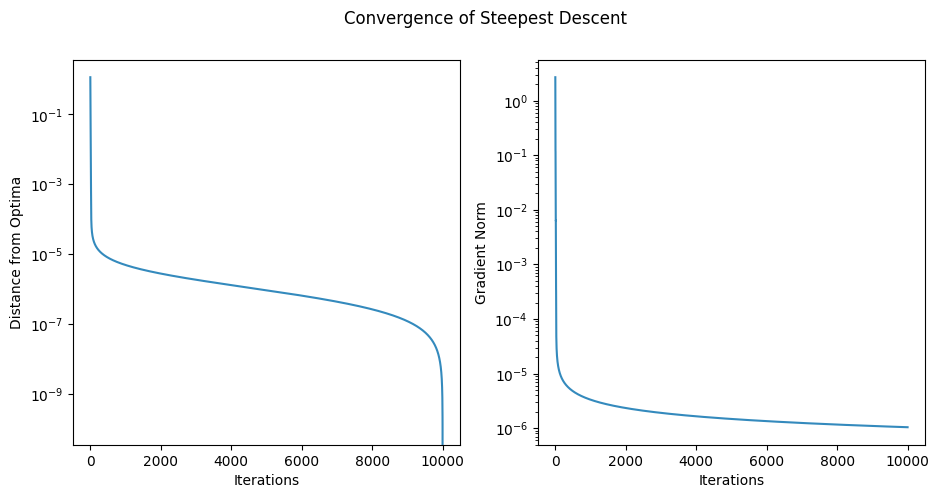

In [13]:
iterators = cache["Iterator"]
gradient_norms = cache["Gradient Norm"]

distance_from_optima = [np.linalg.norm(iterator - optima) for iterator in iterators]

plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.plot(distance_from_optima)
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Distance from Optima")

plt.subplot(1, 2, 2)
plt.plot(gradient_norms)
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Gradient Norm")

plt.suptitle("Convergence of Steepest Descent")
plt.show()